# The Agent-Environment Interaction

In this exercise, you will implement the interaction of a reinforecment learning agent with its environment. We will use the gridworld environment from the second lecture. You will find a description of the environment below, along with two pieces of relevant material from the lectures: the agent-environment interface and the Q-learning algorithm.

1. Create an agent that chooses actions randomly with this environment. 

2. Create an agent that uses Q-learning. You can use initial Q values of 0, a stochasticity parameter for the $\epsilon$-greedy policy function $\epsilon=0.05$, and a learning rate $\alpha = 0.1$. But feel free to experiment with other settings of these three parameters.

3. Plot the mean total reward (i.e. the undiscounted return) obtained by the two agents for each episode. This kind of graph is called a **learning curve**, and it gives us an idea of how our agent's performance changes during training.


## The agent-environment interface

<img src="img/agent-environment.png" style="width: 500px;" align="left"/> 

<br><br><br>

The interaction of the agent with its environments starts at decision stage $t=0$ with the observation of the current state $s_0$. (Notice that there is no reward at this initial stage.) The agent then chooses an action to execute at decision stage $t=1$. The environment responds by changing its state to $s_1$ and returning the numerical reward signal $r_1$. 


## The environment: Navigation in a gridworld

<img src="img/gold.png" style="width: 250px;" align="left"/>

The agent has four possible actions in each state (grid square): west, north, south, and east. The actions are unreliable. They move the agent in the intended direction with probability 0.8, and with probability 0.2, they move the agent in a random other direction. If the direction of movement is blocked, the agent remains in the same grid square. The initial state of the agent is one of the five grid squares at the bottom, selected randomly. The grid squares with the gold and the bomb are **terminal states**. If the agent finds itself in one of these squares, the episode ends. Then a new episode begins with the agent at a randomly selected initial state.

You will use a reinforcement learning algorithm to compute the best policy for finding the gold with as few steps as possible while avoiding the bomb. For this, we will use the following reward function: $-1$ for each navigation action, an additional $+10$ for finding the gold, and an additional $-10$ for hitting the bomb. For example, the immediate reward for transitioning into the square with the gold is $-1 + 10 = +9$. Do not use discounting (that is, set $\gamma=1$).

## Q-Learning
For your reference, the pseudocode for the Q-Learning algorithm is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131).
<img src="img/q.png" style="width: 720px;"/>


## Example of a learning curve

<img src="img/lc_example.png" style="width: 550px;" align="left"/>

<br><br><br><br>

This is a sample learning curve and shows the reward obtained by a Q-learning agent across 500 episodes. Do not try to replicate this exact curve! It was computed using a different environment than the one described here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def action_to_index(action):
    if action == 'UP':
        return 0
    elif action == 'DOWN':
        return 1
    elif action == 'LEFT':
        return 2
    else:
        return 3

In [3]:
def index_to_action(index):
    if index == 0:
        return 'UP'
    elif index == 1:
        return 'DOWN'
    elif index == 2:
        return 'LEFT'
    else:
        return 'RIGHT'

## Create an agent that chooses actions randomly with this environment.

In [5]:
class RandomAgent():
    def choose_action(self, available_actions):
        number_of_actions = len(available_actions)
        random_action_index = np.random.randint(0, number_of_actions)
        action = index_to_action(random_action_index)
        return action

## Q Learning Agent

In [6]:
class Q_Agent():
    ## Initialise S
    def __init__(self, env, epsilon=0.05, alpha=0.1, gamma=1):
        self.env = env
        self.q_table = dict()
        for i in range(env.num_cells):
                self.q_table[i] = {'UP':0, 'RIGHT':0, 'DOWN':0, 'LEFT':0}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
    
    ## Choose policy and action
    ## Choose Action from State using policy derive from Q-table
    def choose_action(self, available_actions):
        ## Explore Randomly
        if np.random.uniform(0,1) < self.epsilon:
            action = available_actions[np.random.randint(0, len(available_actions))]
            
        ## Act Greedily
        else:
            # Set current position in Q table
            q_value = self.q_table[self.env.agent_position]
            max_v = max(q_value.values())
            action = np.random.choice([k for k,v in q_value.items() if v == max_v])
        return action
    
    ## Update the new q_value
    def learn(self, old_state, reward, new_state, action):
        q_value = self.q_table[new_state]
        max_v_new_state = max(q_value.values())
        action = index_to_action(action)
        current_q_value = self.q_table[old_state][action]
        
        ## Update formula
        self.q_table[old_state][action] = current_q_value + (self.alpha * (reward[0] + self.gamma * max_v_new_state - current_q_value))

        
def play(env, agent, episode=500, learn=False):
    reward_per_episode = []
    
    for i in range(episode):
        total_reward = 0
        step = 0
        done = False
        
        while step < 500 and done != True:
            old_state = env.agent_position
            action = agent.choose_action(env.actions)
            action = action_to_index(action)
            reward = env.make_step(action)
            new_state = env.agent_position
            
            ## Update Q_value if specified learning
            if learn == True:
                agent.learn(old_state, reward, new_state, action)
            
            total_reward += reward[0]
            step += 1
            
            if env.terminal() == 'Done':
                env.__init__()
                done = True
                
        reward_per_episode.append(total_reward)
        
    return reward_per_episode

Available_actions = ['UP', 'RIGHT', 'DOWN', 'LEFT']
Randomly chosen action = DOWN


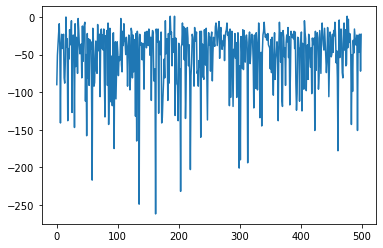

In [7]:
env = Gridworld()
agent = RandomAgent()

available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)

reward_per_episode = play(env, agent, episode=500)

plt.plot(reward_per_episode)

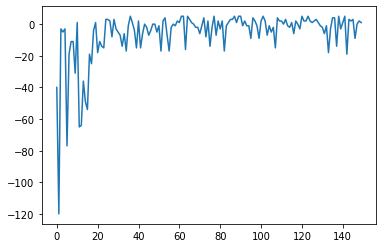

In [8]:
env = Gridworld()
agentQ = Q_Agent(env)

reward_per_episode = play(env, agentQ, episode=150, learn=True)
plt.plot(reward_per_episode)

In [9]:
def pretty(d, indent=0):
    for k, v in d.items():
        print('\t'*indent + str(k))
        if isinstance(v, dict):
            pretty(v, indent+1)
        else:
            print('\t'*indent+str(v))
            
pretty(agentQ.q_table)

0
	UP
	-2.69244897453657
	RIGHT
	-2.662723167490903
	DOWN
	-2.4913079036848442
	LEFT
	-2.707979522172619
1
	UP
	-2.183667108841725
	RIGHT
	-2.2037681595546617
	DOWN
	-1.2162409039935584
	LEFT
	-2.3904911018711172
2
	UP
	0.8465544066135704
	RIGHT
	-2.0415464307436277
	DOWN
	-2.13170839273152
	LEFT
	-1.9138147725018242
3
	UP
	-2.3826408695834194
	RIGHT
	-1.164350050224696
	DOWN
	-2.4188237613319767
	LEFT
	-2.5000922588148544
4
	UP
	-2.648176552518694
	RIGHT
	-2.990150659131741
	DOWN
	-2.957291692721496
	LEFT
	-2.932208425203196
5
	UP
	-1.862744067502884
	RIGHT
	-1.8632082321058934
	DOWN
	-1.8100750128746603
	LEFT
	-1.9806535957063622
6
	UP
	-1.4466767977453854
	RIGHT
	-1.492321910754291
	DOWN
	0.16466144508241964
	LEFT
	-1.5054821682840962
7
	UP
	2.5579935733130434
	RIGHT
	-0.966442257404566
	DOWN
	-1.3349651875409643
	LEFT
	-1.396647219551637
8
	UP
	-1.728229096125139
	RIGHT
	-0.17190601674649564
	DOWN
	-1.7413287553971912
	LEFT
	-1.726475866459307
9
	UP
	-0.6647475697509
	RIGHT
	-2.262